In [2]:
using Revise
using DrWatson
@quickactivate "SpikingNeuralNetworks"
using SpikingNeuralNetworks
SNN.@load_units
import SpikingNeuralNetworks: AdExParameter
using Statistics, Random
using Plots

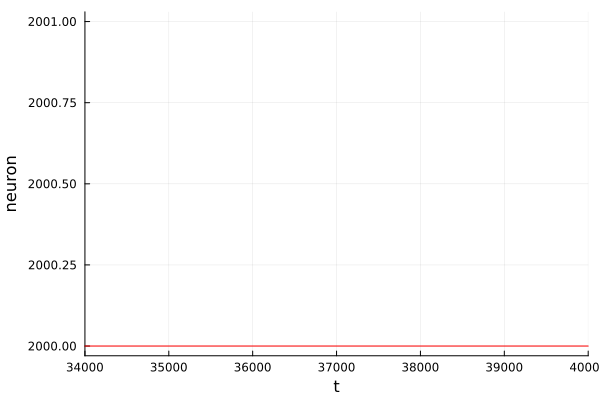

In [16]:
Input = SNN.Poisson(; N=1000, param=SNN.PoissonParameter(;rate=1Hz))

E = SNN.AdEx(;N = 2000, param = AdExParameter())
I = SNN.IF(;N = 500, param = SNN.IFParameter())

Proj = SNN.SpikingSynapse(Input, E, :ge; σ=10, p = 0.2)

EE = SNN.SpikingSynapse(E, E, :ge; σ=10, p = 0.2)
EI = SNN.SpikingSynapse(E, I, :ge; σ=40, p = 0.2)
IE = SNN.SpikingSynapse(I, E, :gi; σ =-50, p = 0.02)
II = SNN.SpikingSynapse(I, I, :gi; σ =-10,  p = 0.02)

P = [E, I]
C = [EE, EI, IE, II]
# C = [EE, EG, GG]

SNN.monitor([E, I], [:fire])
SNN.sim!(P, C; duration = 4second)
SNN.raster([E,I], [3.4,4].*10e3)


In [6]:
# # # E = SNN.AdEx(; N=10,param=SNN.AdExParameter(; El=-70mV, Vt=-50.4mV, τm=20ms, a=2nS, b=60nA))
EE = SNN.SpikingSynapse(I, E, :ge; σ=50, p=0.2)
# what is :ge

P = [E, I]

SNN.monitor(E, [:v, :fire, :w])
SNN.sim!(P, [EE]; duration = 700ms)

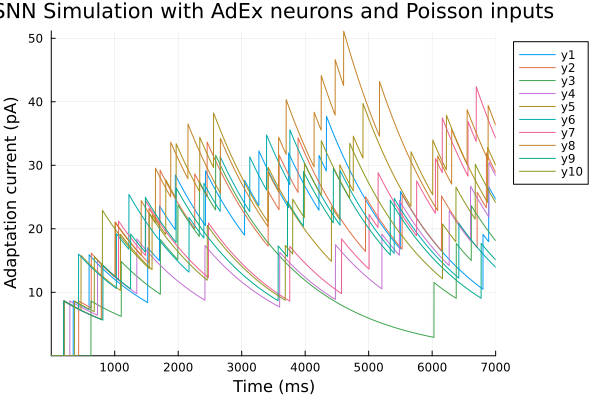

In [7]:
p1= plot(SNN.vecplot(E,:w),
legend = :outertopright,
xlabel = "Time (ms)",
ylabel = "Adaptation current (pA)", 
title = "SNN Simulation with AdEx neurons and Poisson inputs")